### Append Path

In [2]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload 2

### Load Data

In [3]:
import pandas as pd

df = pd.read_csv("../data/processed/feature_engineered_data.csv")

### Train Test Split

In [4]:
from src.modeling import split_data

X_train, X_test, y_train, y_test = split_data(df, target_col="SolarGeneration", test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (568003, 11)
X_test shape: (142001, 11)


### Model Training

In [5]:
from src.modeling import train_model

model = train_model(X_train, y_train)

Initializing LightGBM...
Training Model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 568003, number of used features: 9
[LightGBM] [Info] Start training from score 7.271325
Training Complete.


### Model Evaluation

In [7]:
from src.modeling import evaluate_model

preds = evaluate_model(model, X_test, y_test)

--- Model Performance ---
MAE (Mean Absolute Error): 1.9630 kWh
RMSE (Root Mean Sq Error): 3.7970 kWh
R2 Score: 0.8963


### Visualization

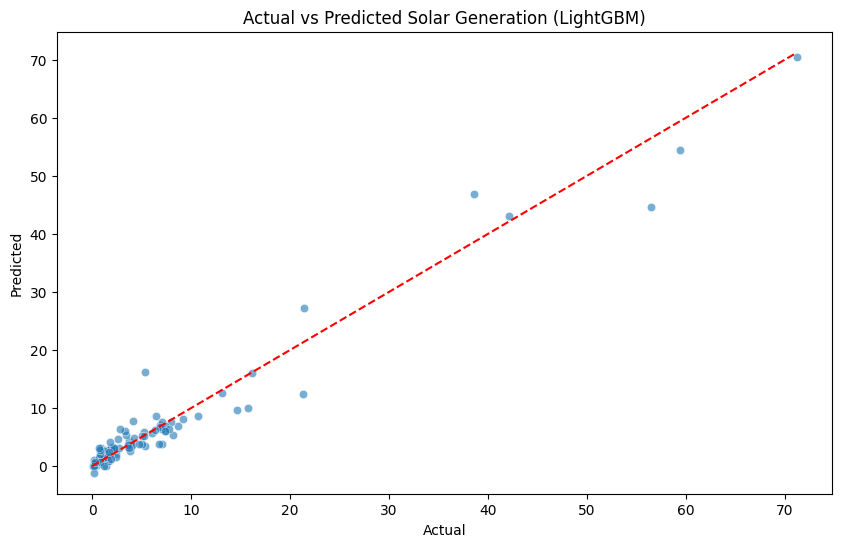

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({"Actual": y_test, "Predicted": preds})
sample = results_df.sample(100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Actual", y="Predicted", data=sample, alpha=0.6)
plt.plot([0, sample["Actual"].max()], [0, sample["Actual"].max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Solar Generation (LightGBM)")
plt.show()

### Feature Importance

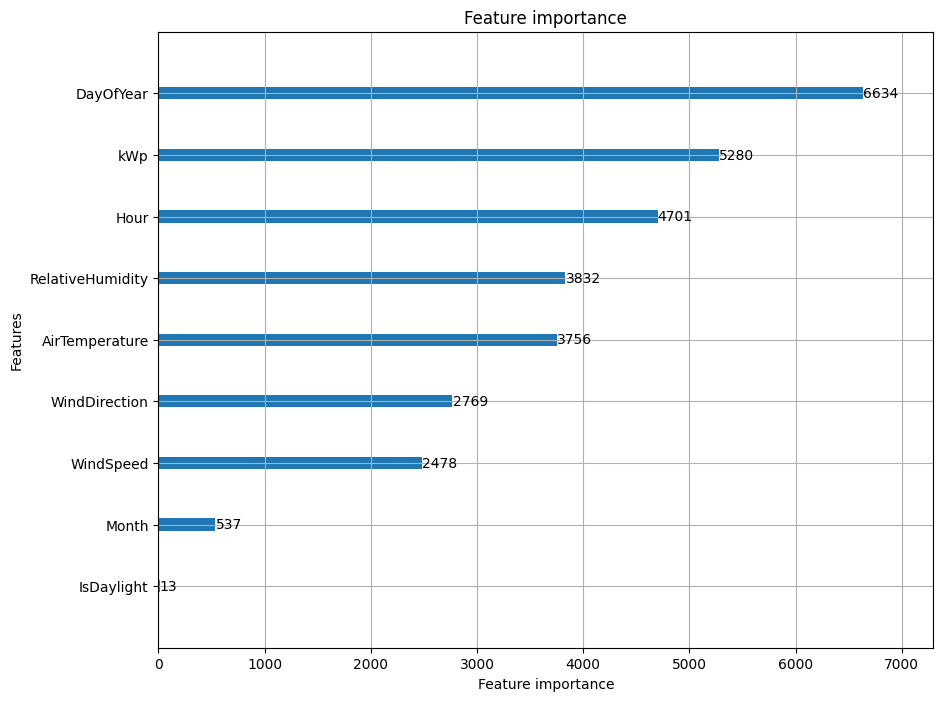

In [9]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, max_num_features=10)
plt.show()

### Save Model

In [10]:
from src.modeling import save_model

save_model(model, "../models/solar_lightgbm.pkl")

Model saved to ../models/solar_lightgbm.pkl
